# Strain rates from two bursts

In [1]:
# Setting up environment
import sys
import pandas as pd
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
import gcsfs
import math

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    14:32:20 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    14:32:20 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    14:32:20 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:34391")
client

<Client: 'tcp://127.0.0.1:34391' processes=4 threads=16, memory=125.81 GiB>

In [3]:
# Select test data
def reload_winter(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}_winter22_23'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        consolidated=True, 
        chunks={}) 
    return ds

ds_101 = reload_winter("A101").isel(attenuator_setting_pair=1,time=range(5000,6000)).compute()
# approx 10 days

Text(0.5, 0, 'date')

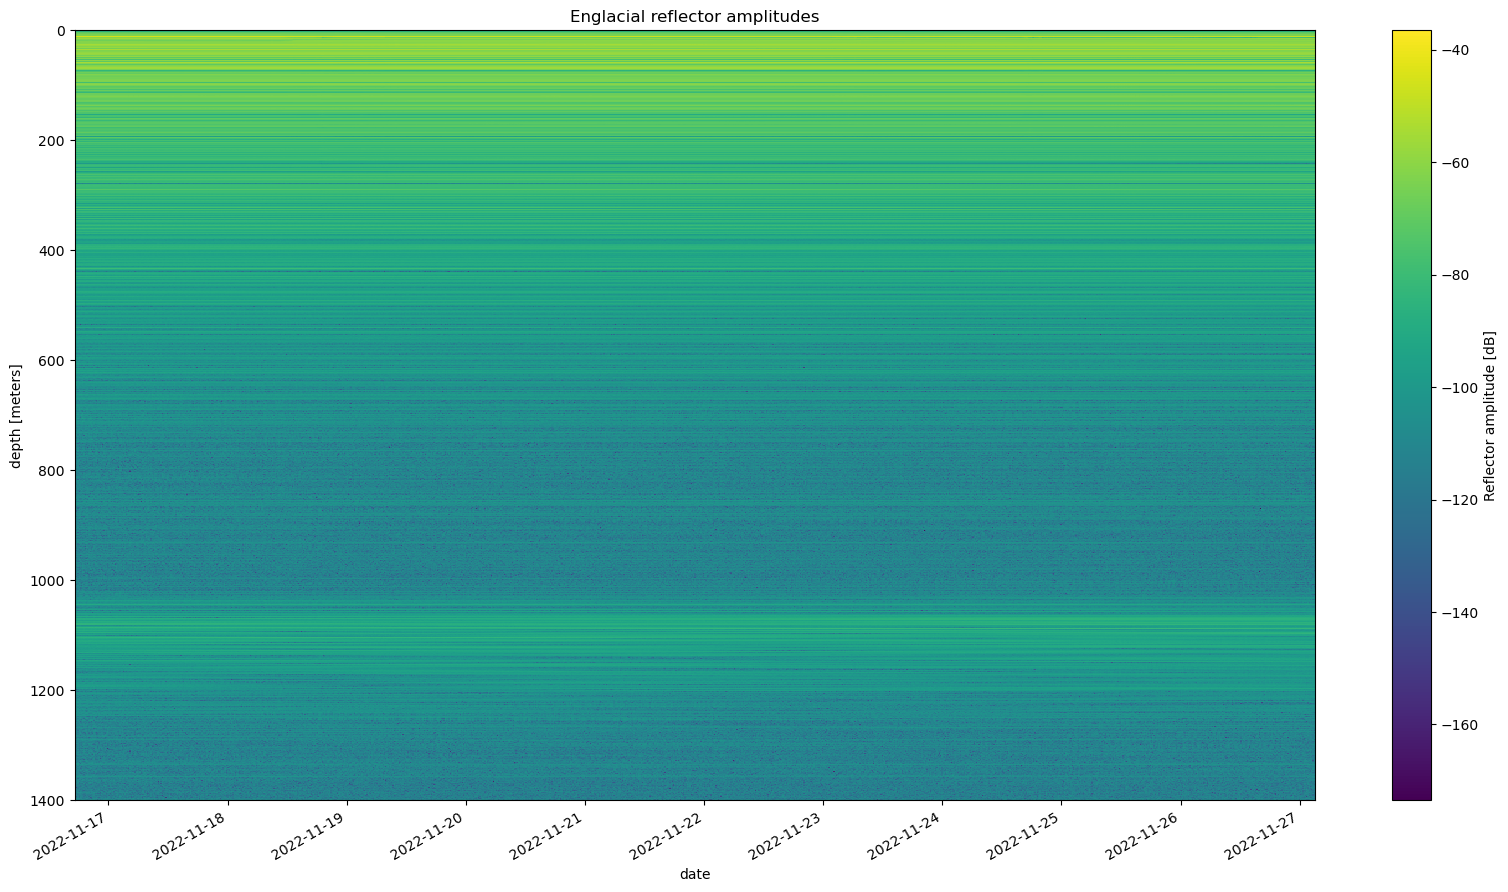

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
xa.dB(ds_101.profile_stacked).plot(ax=ax,x='time',cbar_kwargs={'label':'Reflector amplitude [dB]'})
ax.invert_yaxis()
ax.set_title("Englacial reflector amplitudes")
plt.xlabel('date')
# clean data

In [5]:
# stagger the bursts
b1= ds_101.profile_stacked.isel(time=range(0,len(ds_101.profile_stacked)-1))
b2 = ds_101.profile_stacked.isel(time=range(1,len(ds_101.profile_stacked)))

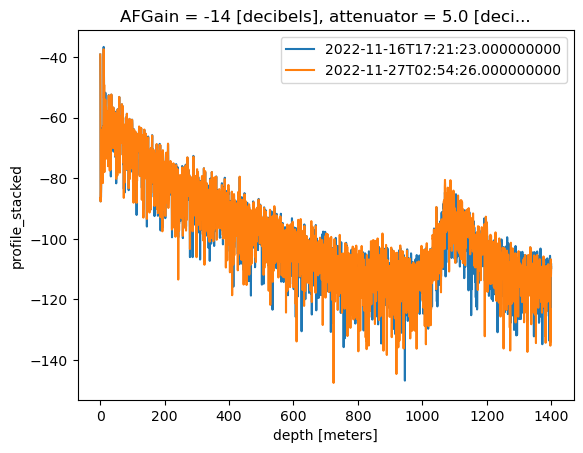

In [6]:
xa.dB(b1.isel(time=0)).plot(label=f'{b1.isel(time=0).time.values}')
xa.dB(b2.isel(time=-1)).plot(label=f'{b2.isel(time=-1).time.values}')
plt.legend()

In [7]:
ds, co, phi = xa.generate_range_diff(b1.isel(time=[0]),b2.isel(time=[-1]),20,20,None,0,0.95)

INFO     14:32:52 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s


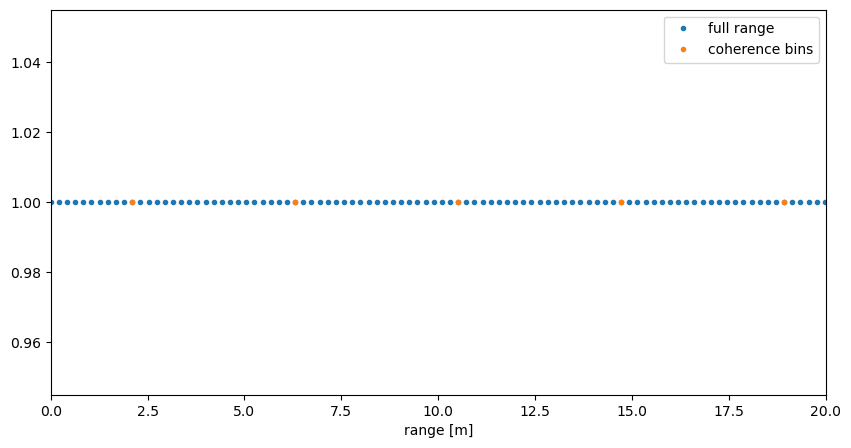

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(b1.profile_range.values,np.ones(b1.profile_range.values.shape),marker='.',linestyle='None',label='full range')
plt.plot(ds.profile_range.values,np.ones(ds.profile_range.values.shape),marker='.',linestyle='None',label='coherence bins')
plt.xlabel('range [m]')
plt.xlim([0,20])
plt.legend()

INFO     14:33:09 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s
INFO     14:33:10 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s
INFO     14:33:10 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s
INFO     14:33:10 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s
INFO     14:33:10 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [898383.]s


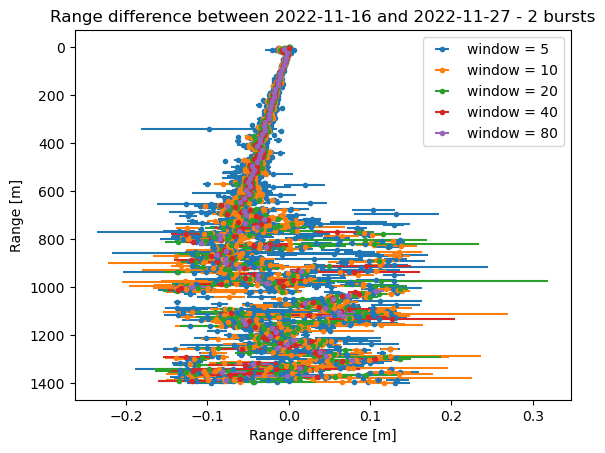

In [9]:
fig, ax = plt.subplots()
for i in [5,10,20,40,80]:
    ds, co, phi = xa.generate_range_diff(b1.isel(time=[0]),b2.isel(time=[-1]),i,i,None,0,0.95)
    ax.errorbar(ds.range_diff.isel(time=0),ds.profile_range,yerr=None,xerr=ds.err.isel(time=0),linestyle='None',marker='.',label=f'window = {i}')
ax.invert_yaxis()
plt.xlabel('Range difference [m]')
plt.ylabel('Range [m]')
plt.title(f'Range difference between {b1.isel(time=0).time.values:.10} and {b2.isel(time=-1).time.values:.10} - 2 bursts')
plt.legend()

Text(0.5, 1.0, 'Coherence amplitude between 2022-11-16 and 2022-11-27 - 2 bursts')

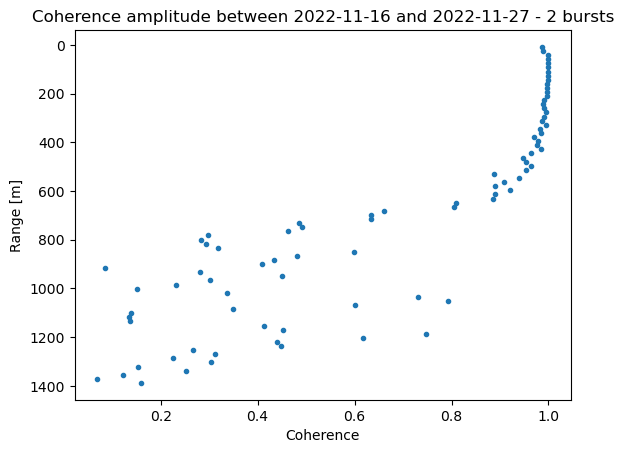

In [10]:
fig, ax = plt.subplots()
plt.plot(abs(co[0]),ds.profile_range,linestyle='None',marker='.')
ax.invert_yaxis()
plt.xlabel('Coherence')
plt.ylabel('Range [m]')
plt.title(f'Coherence amplitude between {b1.isel(time=0).time.values:.10} and {b2.isel(time=-1).time.values:.10} - 2 bursts')


Text(0.5, 1.0, 'Phase between 2022-11-16 and 2022-11-27 - 2 bursts')

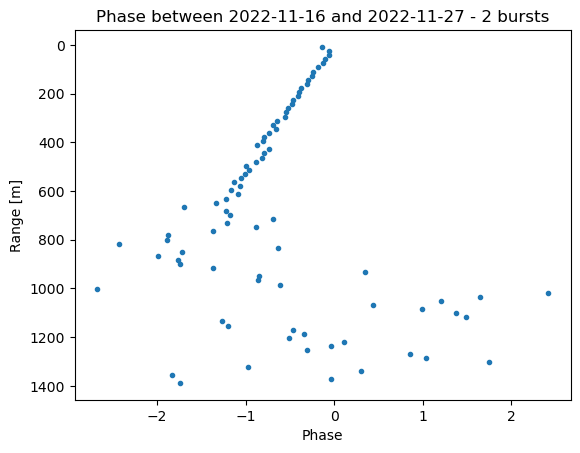

In [11]:
fig, ax = plt.subplots()
plt.plot(phi[0],ds.profile_range,linestyle='None',marker='.')
ax.invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('Range [m]')
plt.title(f'Phase between {b1.isel(time=0).time.values:.10} and {b2.isel(time=-1).time.values:.10} - 2 bursts')


In [12]:
# Now let's do this calculation across the whole series, between individual bursts

In [34]:
window = 20
ds_full, co_full, phi_full = xa.generate_range_diff(b1,b2,window,window,None,0,0.95)
ds, co, phi = xa.generate_range_diff(b1.isel(time=[0]),b2.isel(time=[-1]),window,window,None,0,0.95)

INFO     14:37:05 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [900. 901. 900. 901. 899. 900. 900. 900. 900. 900. 900. 900. 908. 892.
 900. 934. 866. 901. 905. 894. 900. 900. 908. 892. 900. 900. 900. 905.
 908. 893. 899. 931. 876. 892. 899. 901. 899. 901. 901. 901. 898. 900.
 940. 860. 898. 902. 901. 900. 900. 907. 898. 902. 901. 892. 900. 900.
 900. 930. 869. 900. 900. 900. 900. 901. 898. 900. 908. 909. 898. 895.
 899. 901. 909. 911. 901. 877. 908. 892. 892. 900. 901. 900. 901. 900.
 899. 900. 900. 902. 900. 900. 904. 895. 899. 900. 901. 900. 899. 900.
 902. 899. 900. 901. 899. 905. 900. 900. 906. 889. 900. 900. 900. 900.
 900. 900. 900. 900. 908. 892. 900. 900. 901. 899. 928. 874. 901. 901.
 908. 892. 899. 901. 910. 889. 900. 901. 900. 899. 909. 891. 928. 871.
 900. 900. 901. 901. 900. 909. 901. 890. 899. 900. 900. 900. 900. 900.
 910. 890. 935. 865. 901. 899. 901. 899. 900. 900. 900. 900. 908. 892.
 900. 900. 917. 883. 901. 903. 905. 919. 871. 900. 9

Text(0.5, 1.0, 'Coherence Amplitude')

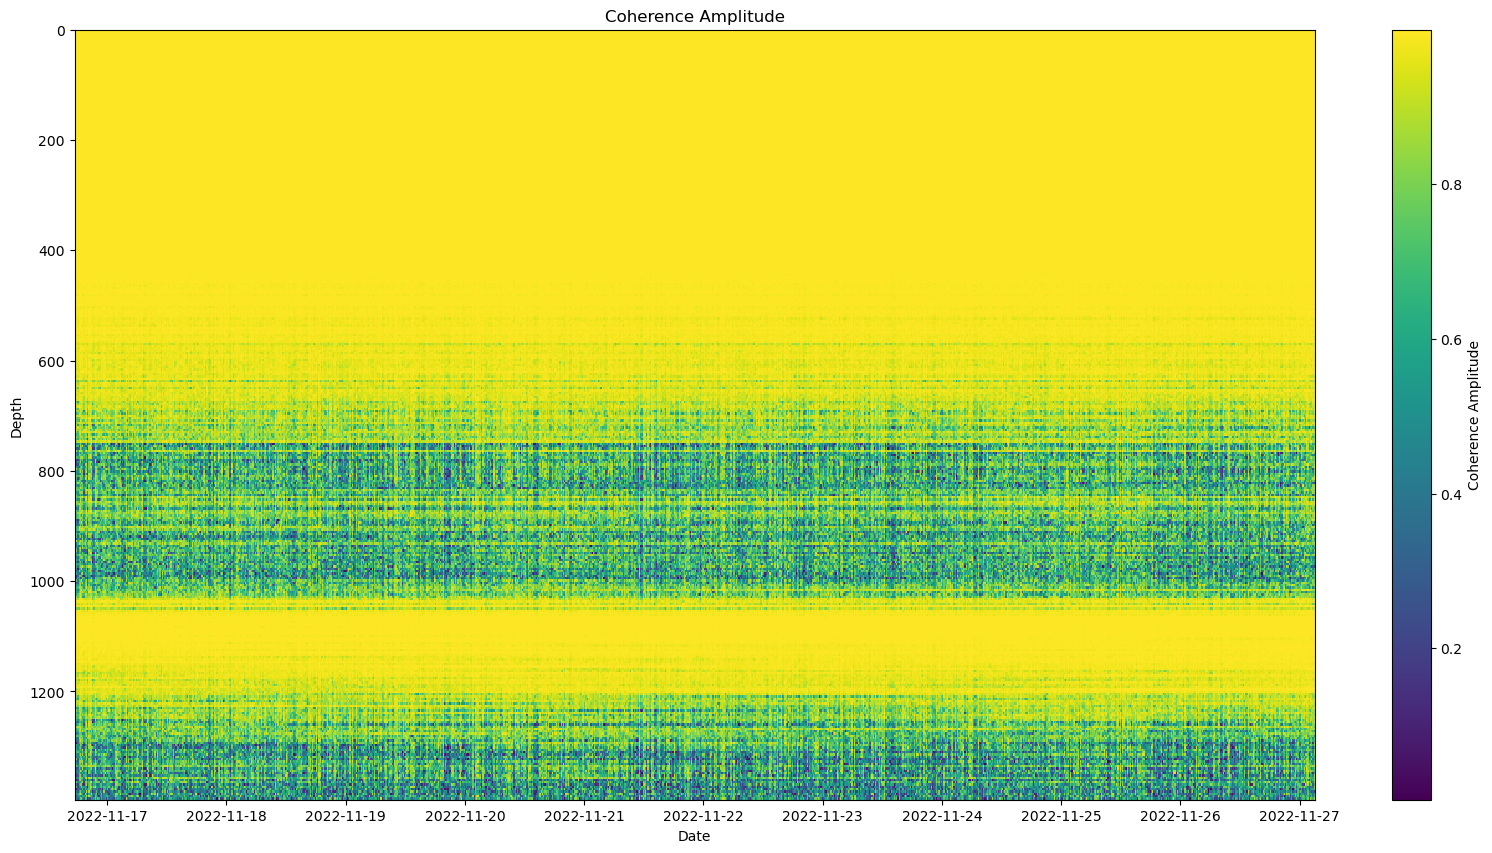

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

im = plt.pcolormesh(ds_full.time,ds_full.profile_range,abs(co_full).transpose())
fig.colorbar(im,label='Coherence Amplitude')
ax.invert_yaxis()
plt.ylabel('Depth')
plt.xlabel('Date')
plt.title('Coherence Amplitude')

Text(0.5, 1.0, 'Phase')

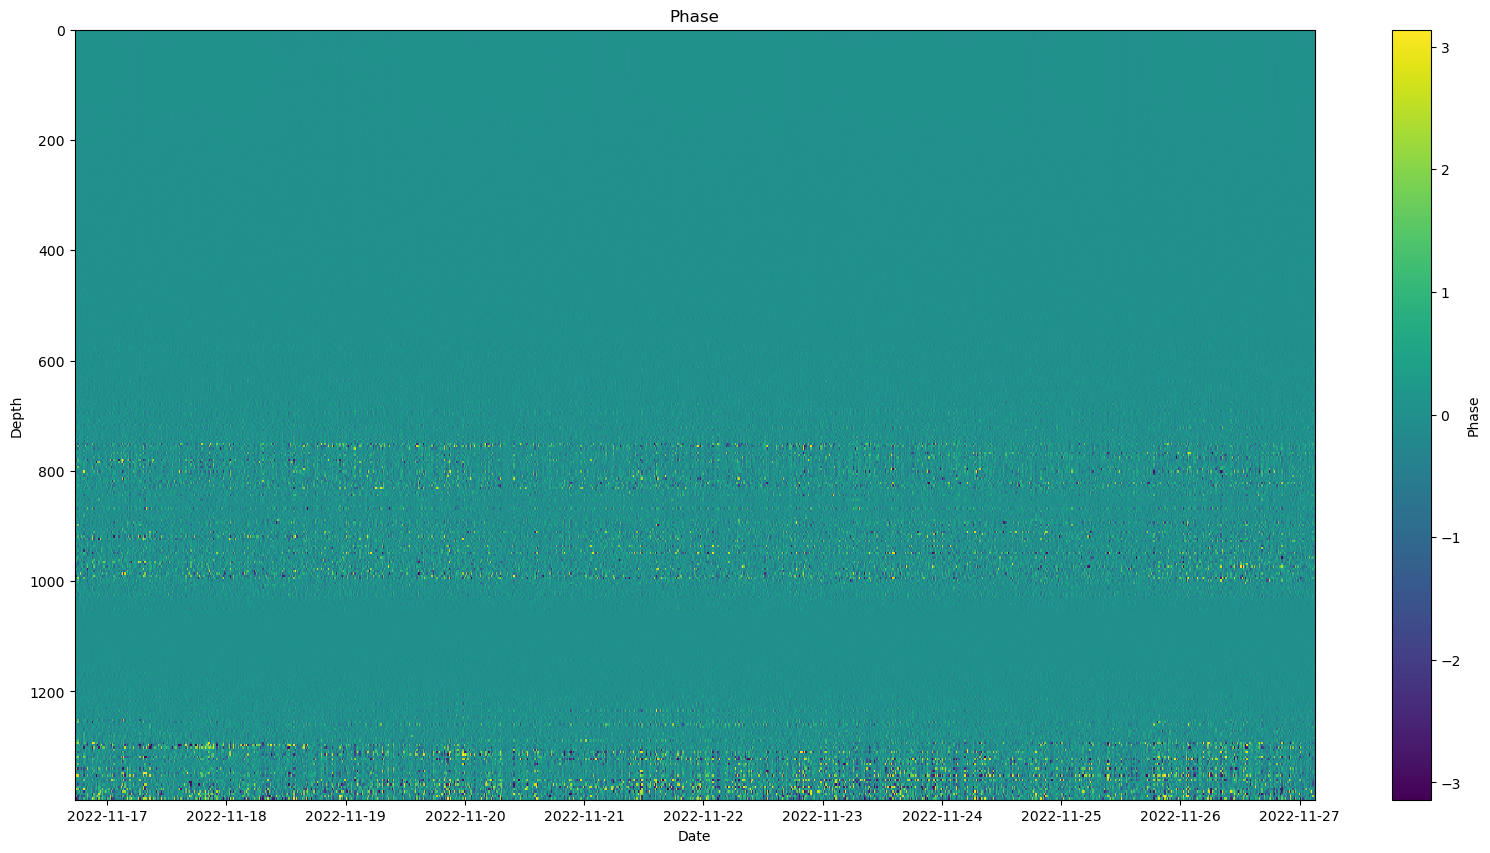

In [36]:
fig, ax = plt.subplots(figsize=(20,10))

im = plt.pcolormesh(ds_full.time,ds_full.profile_range,phi_full.transpose())
fig.colorbar(im,label='Phase')
ax.invert_yaxis()
plt.ylabel('Depth')
plt.xlabel('Date')
plt.title('Phase')

Text(0.5, 1.0, 'Range difference')

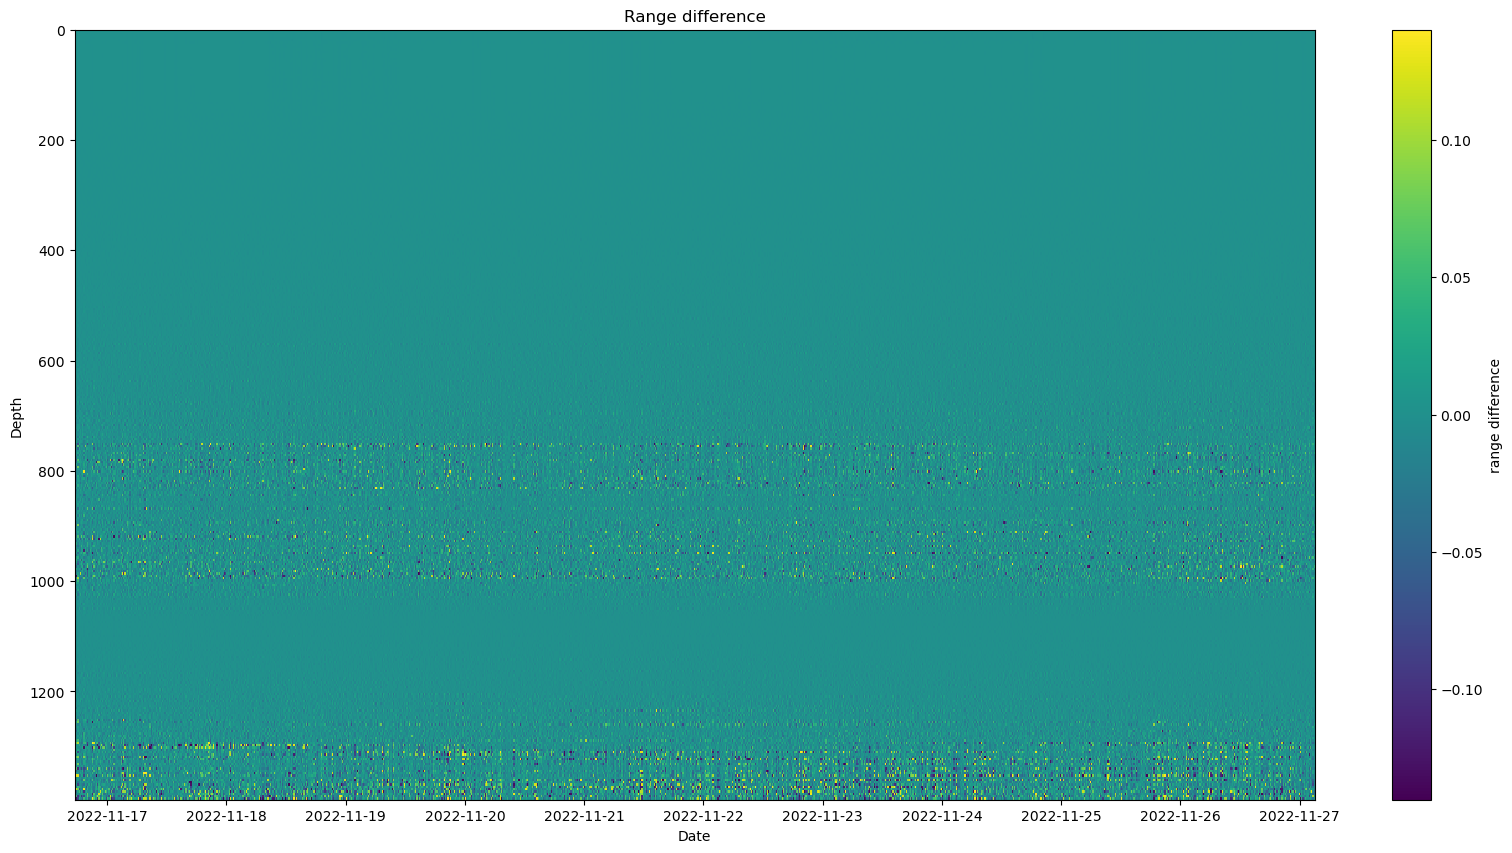

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

im = plt.pcolormesh(ds_full.time,ds_full.profile_range,ds_full.range_diff.transpose())
fig.colorbar(im,label='range difference')
ax.invert_yaxis()
plt.ylabel('Depth')
plt.xlabel('Date')
plt.title('Range difference')

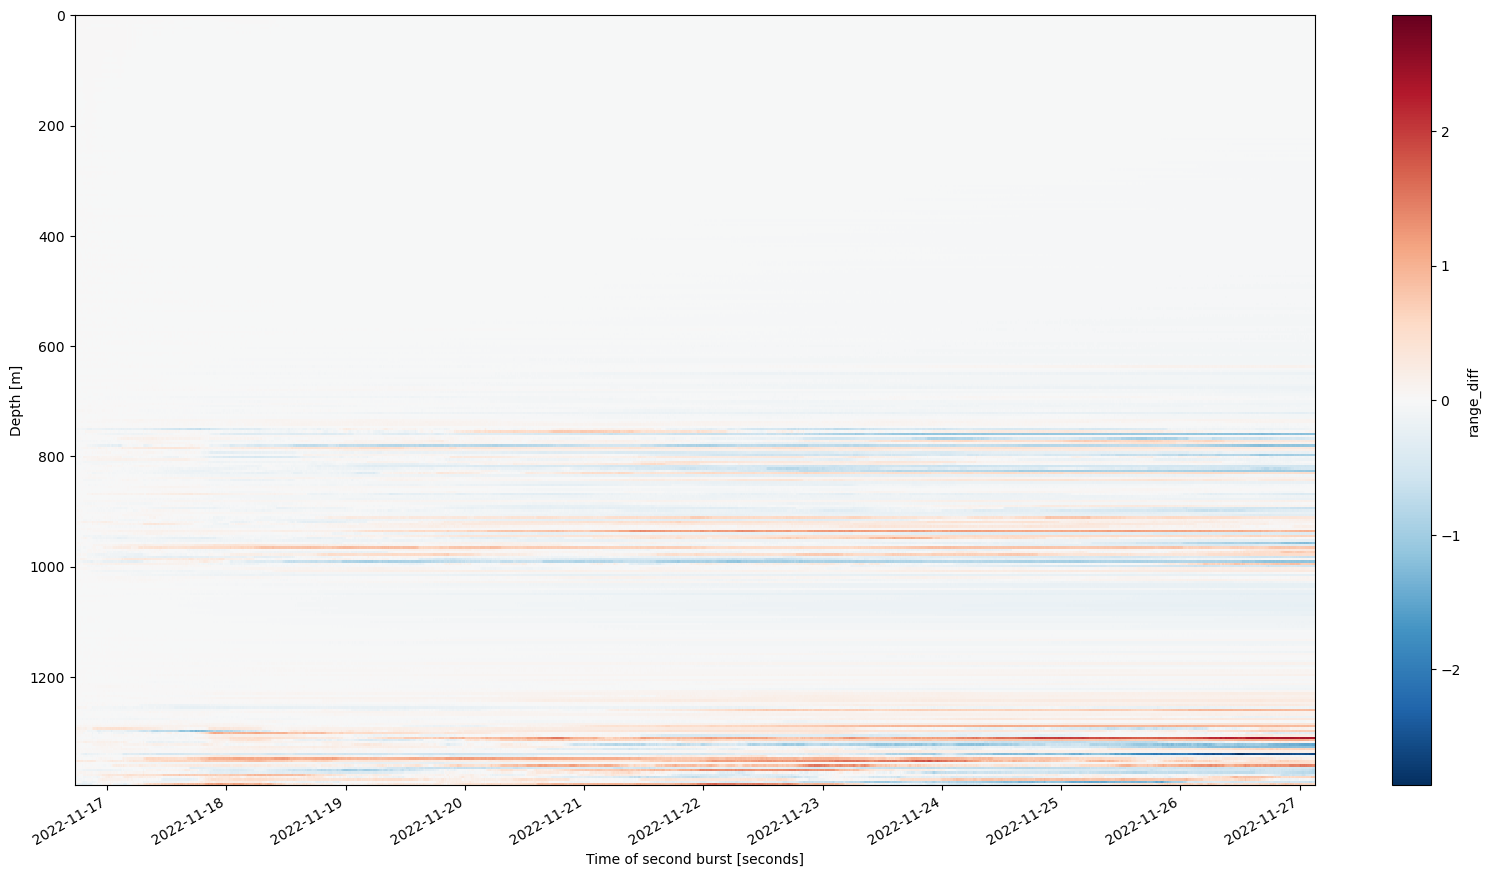

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

ds_full.range_diff.cumsum(dim='time').plot(ax=ax,x='time',cmap='RdBu_r')
ax.invert_yaxis()

In [39]:
total_displacement = ds_full.range_diff.sum(dim='time')
total_errs = np.sqrt((ds_full.err**2).sum(dim='time'))

(-0.5, 0.5)

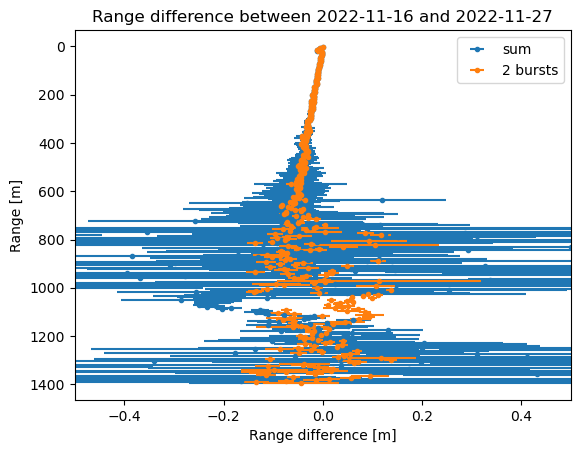

In [40]:
fig, ax = plt.subplots()

ax.errorbar(total_displacement,total_displacement.profile_range,yerr=None,xerr=total_errs,linestyle='None',marker='.',label='sum')
ax.errorbar(ds.range_diff.isel(time=0),ds.profile_range,yerr=None,xerr=ds.err.isel(time=0),linestyle='None',marker='.',label='2 bursts')

ax.invert_yaxis()
plt.xlabel('Range difference [m]')
plt.ylabel('Range [m]')
plt.title(f'Range difference between {b1.isel(time=0).time.values:.10} and {b2.isel(time=-1).time.values:.10}')
plt.legend()
plt.xlim([-0.5,0.5])

In [21]:
ds_2, co_2, phi_2 = xa.generate_range_diff(b1.isel(time=[0]),b2.isel(time=[1]),20,20,None,0,0.95)

INFO     17:00:50 	 ApRESDefs.py @function generate_range_diff line 669 - Time between bursts : [1801.]s


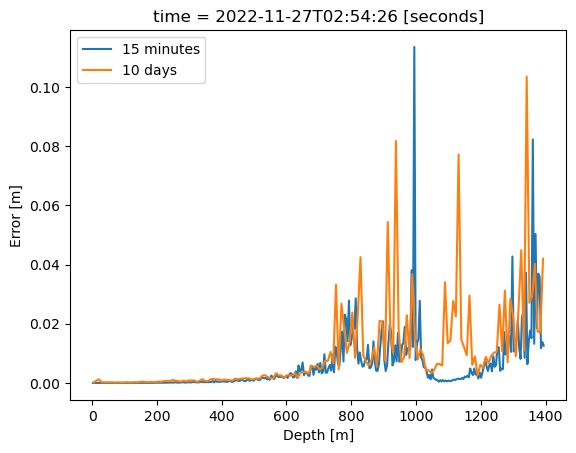

In [35]:
ds_2.err.plot(label='15 minutes')
ds.err.plot(label='10 days')

#plt.xlim([195,205])
#plt.ylim([0,0.0004])
plt.legend()

(0.0, 0.004)

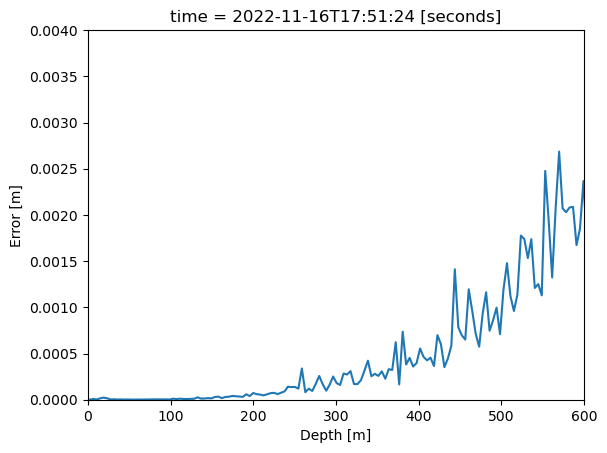

In [28]:
ds_2.err.plot()
plt.xlim([0,600])
plt.ylim([0,0.004])